####  `this NoteBook is by/Mohammed Agoor and it will discuss implementation KMeans from scratch`
#### ` you can try K with any number you want , but here i check my solution on K=4`

-----

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from copy import deepcopy

### Create cost function

In [2]:
def dist(a, b):
    ''' this function tries to get the euclidean distance by using (norm 2 of vectos)
    Args:
    *****
        (a : array) : np.array
        (b : array) : np.array
        
    Returns:
    *******
        return the euclidean distance between two arrays using (norm 2 vector method)
    '''
    return np.linalg.norm((a - b), 2)

### Create some Data

In [3]:
### using make_blobs random datasets embeded in sk-learn
### choosing to be K=4 clusters
x, y = make_blobs(n_samples=2000, centers=4, n_features=2, random_state=42)
x

array([[ 4.51134132,  0.09132064],
       [ 5.18134156,  2.73232484],
       [-8.23070156, -8.20256755],
       ...,
       [-7.3328756 , -5.42764206],
       [-8.51911135, -7.2725807 ],
       [ 4.76254915,  3.59784814]])

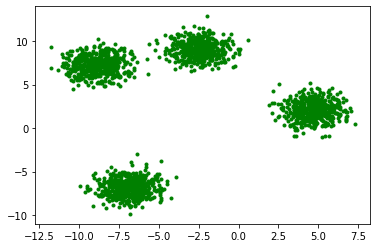

In [4]:
plt.plot(x[:,0], x[:,1], 'g.');

### First Initialization of Centroids

In [5]:
def initial_centroids(K, x):
    ''' this function tries to initialize centroids but with smart thinking
        by random but in range of min and max of each features
    
    Args:
    *****
        (K : int) : number of clusters
        (x : 2d array) : array of Features that we are trying to cluster them
    
    Returns:
    *******
        return the initialization of centroids that will be updated later
    '''
    
    centroids = []
    num_features = x.shape[1]
    
    np.random.seed(42)
    for i in range(num_features):
        cent = np.random.randint(np.min(x[:,i]), np.max(x[:,i]), size=K)
        centroids.append(cent)
        
    centroids = np.array(centroids).T
    
    return centroids

In [6]:
centroids = initial_centroids(K=4, x=x)
centroids

array([[-5, 11],
       [ 3, -3],
       [-1,  9],
       [-4,  1]])

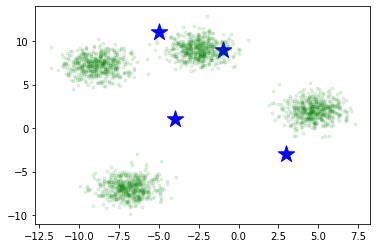

In [7]:
plt.plot(x[:,0], x[:,1], 'g.', alpha=0.1)
plt.scatter(centroids[:,0], centroids[:,1], s=300, marker='*', c='b');

In [8]:
def Kmeans(K, centroids, x):
    ''' this function tries to implement KMeans from scratch by simply apply its theory
    
    Args:
    *****
     (K : int) : Number of Clusters
     (centroids : 2d array) : Initialization of centroids that was done in the previous function
     (x : 2d array) : array of Features that we are trying to cluster them
     
    Returns:
    *******
        this function returns new final centroids 
            and the number of cluster of each data point respectively 
    '''
    
    clusters_total = np.zeros(len(x))
    
    error = 1   ### simple initial value to enter while loop
    
    while error != 0:
        
        for i in range(len(x)):
            
            ## get the distance between instance and each centroid
            distances = [dist(x[i], c) for c in centroids]   
            cluster_idx = np.argmin(distances)
            
            clusters_total[i] = cluster_idx
            
        ## take a deep copy beacause centroids will be override
        old_centroids = deepcopy(centroids)
        
        ### assign each cluster to its data and take the mean for each new cluster
        ### get the error using the above function and return to while loop
        ### until finally their is no update and error = 0
        ### error become zero where is no update in centroids 
        for j in range(K):
            data_each_cluster = [x[i] for i in range(len(x)) if clusters_total[i] == j]
            centroids[j] = np.mean(data_each_cluster, axis=0, dtype='float64')
        
        error = dist(centroids, old_centroids)
    
    print('this error should be equla zero and it will be :D => ', error)
    return centroids, clusters_total

In [9]:
final_centroids, final_clusters_total = Kmeans(K=4, centroids=centroids, x=x)

this error should be equla zero and it will be :D =>  0.0


In [10]:
final_centroids

array([[-8,  7],
       [ 4,  2],
       [-2,  9],
       [-6, -6]])

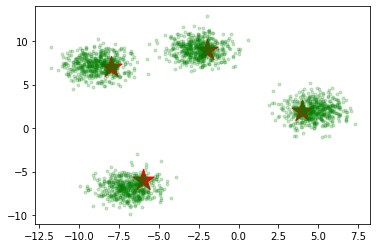

In [11]:
plt.plot(x[:,0], x[:,1], 'g.', alpha=0.2)
plt.scatter(final_centroids[:,0], final_centroids[:,1], s=500, marker='*', c='r');

In [12]:
### craete a dataframe of both features concatenated with clustering output
df = pd.DataFrame(np.c_[x, final_clusters_total], columns=['x1', 'x2', 'cluster_outs'])
df

,x1,x2,cluster_outs
0,4.511341,0.091321,1.0
1,5.181342,2.732325,1.0
2,-8.230702,-8.202568,3.0
3,-8.892233,6.341219,0.0
4,-6.846774,6.491462,0.0
...,...,...,...
1995,3.443996,2.417772,1.0
1996,-8.931272,7.084021,0.0
1997,-7.332876,-5.427642,3.0
1998,-8.519111,-7.272581,3.0


### Final Visualization 

In [13]:
cluster_0 = df[df['cluster_outs'] == 0]
cluster_1 = df[df['cluster_outs'] == 1]
cluster_2 = df[df['cluster_outs'] == 2]
cluster_3 = df[df['cluster_outs'] == 3]

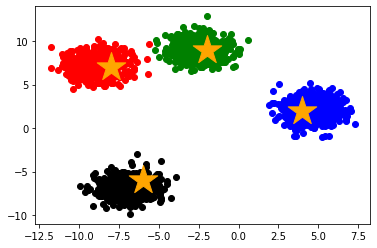

In [14]:
plt.scatter(cluster_0['x1'], cluster_0['x2'], c='r')
plt.scatter(cluster_1['x1'], cluster_1['x2'], c='b')
plt.scatter(cluster_2['x1'], cluster_2['x2'], c='g')
plt.scatter(cluster_3['x1'], cluster_3['x2'], c='k')

plt.scatter(final_centroids[:,0], final_centroids[:,1], s=900, marker='*', c='orange');